<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#模型构建" data-toc-modified-id="模型构建-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>模型构建</a></span></li><li><span><a href="#模型验证" data-toc-modified-id="模型验证-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>模型验证</a></span></li><li><span><a href="#sklearn-GaussianNB" data-toc-modified-id="sklearn-GaussianNB-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>sklearn GaussianNB</a></span></li></ul></div>

# 模型构建

In [29]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from collections import Counter

In [82]:
class GuassianNaiveBayes:
    def __init__(self):
        self.model = None
    
    '''
    function: 计算传入数据data的均值与方差
    '''
    def CalCalculateGaussian(self, data):
        # 与 zip 相反，*zipped 可理解为解压，返回二维矩阵式
        return [(np.mean(feature), np.std(feature)) for feature in zip(*data)]
    
    """
    function: 计算先验概率
        X: 训练数据， 
        Y: 标签
    """
    def fit(self, X, Y): 
        labels_counter = Counter(Y)
        self.labels_prob = {label:count/len(Y) for label,count in labels_counter.items()}
        # 数据分类存放
        dataset = {label:[] for label in labels_counter.keys()}
        for x, y in zip(X, Y):
            dataset[y].append(x)
        # 计算条件概率p(x|y)
        self.features_prob = {label:self.CalCalculateGaussian(data)\
                              for label, data in dataset.items()}
        print('labels probability', self.labels_prob)
        print('The parameters of features\' conditional probability:', self.features_prob)
        
    '''
    function: 预测X中的元素的样本
        X: 输入数据
    '''
    def predict(self, X):
        result = []
        for x in X:
            posterior = {}
            for label in self.labels_prob.keys():
                posterior[label] = self.labels_prob[label]
                for i_feature, mustd in enumerate(self.features_prob[label]):
                    posterior[label] *= stats.norm(mustd[0], mustd[1]).pdf(x[i_feature])
            result.append(sorted(posterior.items(), key=lambda x:x[-1])[-1][0])
        return result

# 模型验证

In [91]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

In [84]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target

# 选取 0， 1， -1三列
data = np.array(iris_df.iloc[:, [0, 1, -1]])
X, Y = data[:, :-1], data[:, -1]
print(data.shape)

(150, 3)


In [85]:
model = GuassianNaiveBayes()
model.fit(X, Y)

labels probability {0.0: 0.3333333333333333, 1.0: 0.3333333333333333, 2.0: 0.3333333333333333}
The parameters of features' conditional probability: {0.0: [(5.006, 0.3489469873777391), (3.428, 0.37525458025186054)], 1.0: [(5.936, 0.5109833656783751), (2.7700000000000005, 0.31064449134018135)], 2.0: [(6.587999999999998, 0.6294886813914926), (2.974, 0.3192553836664309)]}


In [86]:
XTEST = [(5.5, 2.8), (5.5, 3.5), (4.5, 3.5), (6.5, 2.5)]
results = model.predict(XTEST)
print(results)

[1.0, 0.0, 0.0, 1.0]


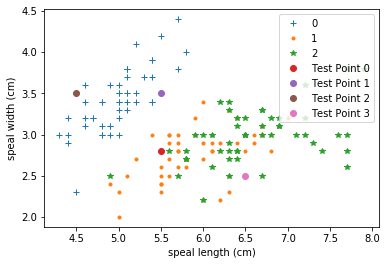

In [89]:
# 可视化
plt.plot(data[:50, 0], data[:50, 1], '+', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], '.', label='1')
plt.plot(data[100:, 0], data[100:, 1], '*', label='2')
for i, point in enumerate(XTEST):
    plt.plot(point[0], point[1], 'o', label='Test Point {0}'.format(i))
plt.xlabel('speal length (cm)')
plt.ylabel('speal width (cm)')
plt.legend()

In [101]:
np.random.seed()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
model = GuassianNaiveBayes()
model.fit(X_train, Y_train)
results = model.predict(X_test)
scores = (results == Y_test)
print('Number of mislabeled points out of a total %d points : %d' % (len(Y_test), len(Y_test) - scores.sum()))
print('Accuracy = {:3.2f}%'.format(Counter(scores)[True]/len(Y_test) * 100))

labels probability {1.0: 0.3482142857142857, 0.0: 0.32142857142857145, 2.0: 0.33035714285714285}
The parameters of features' conditional probability: {1.0: [(5.869230769230769, 0.5154802819745257), (2.7564102564102564, 0.3311168914329832)], 0.0: [(5.05, 0.3539460096932551), (3.4499999999999997, 0.4159994658116229)], 2.0: [(6.597297297297297, 0.6364965282962948), (2.9918918918918918, 0.34592483043666716)]}
Number of mislabeled points out of a total 38 points : 9
Accuracy = 76.32%


#  sklearn GaussianNB

In [102]:
from sklearn.naive_bayes import GaussianNB

In [103]:
clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [104]:
print('Accuracy = {:3.2f}%'.format(clf.score(X_test, Y_test) * 100))

Accuracy = 76.32%
